In [1]:
import cv2
import matplotlib.pyplot as plt


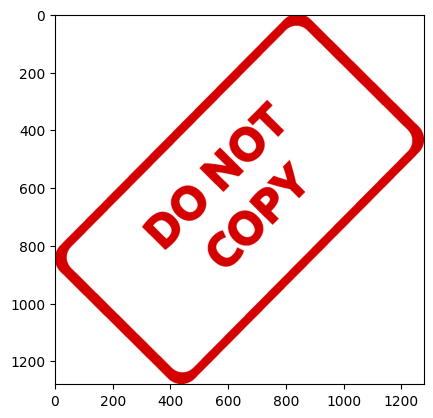

In [6]:
img1 = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/lena.jpeg")
img2 = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/watermark_no_copy.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
plt.imshow(img1)
plt.imshow(img2)

In [7]:
img1.shape, img2.shape

((220, 220, 3), (1280, 1277, 3))

In [13]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0])) # resize함수는 가로 세로로 넣어야함
img1.shape , img2.shape

((600, 600, 3), (600, 600, 3))

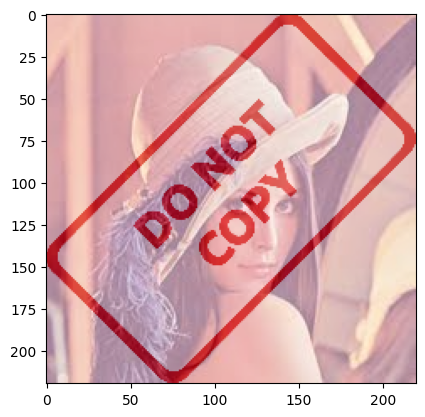

In [9]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma = 0)
plt.imshow(blended)

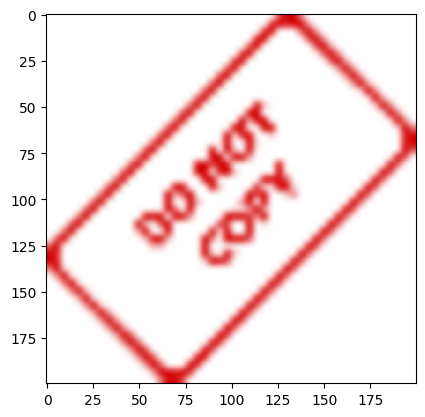

In [28]:
img2 = cv2.resize(img2, (200,200))
plt.imshow(img2)

In [30]:
large_img = img1
small_img = img2

x_offset = 400
y_offset = 0

In [31]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end , x_offset:x_end] = small_img

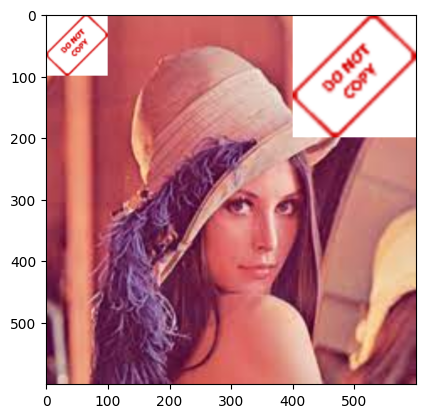

In [32]:
plt.imshow(large_img)

In [42]:
img1 = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/lena.jpeg")
img2 = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/watermark_no_copy.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
img2 = cv2.resize(img2, (400,300))
img1 = cv2.resize(img1, (1440,1080))

In [43]:
img1.shape, img2.shape

((1080, 1440, 3), (300, 400, 3))

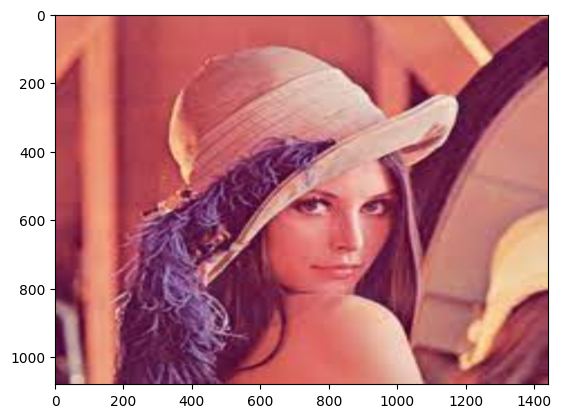

In [41]:
plt.imshow(img1)

In [44]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset


(1040, 780)

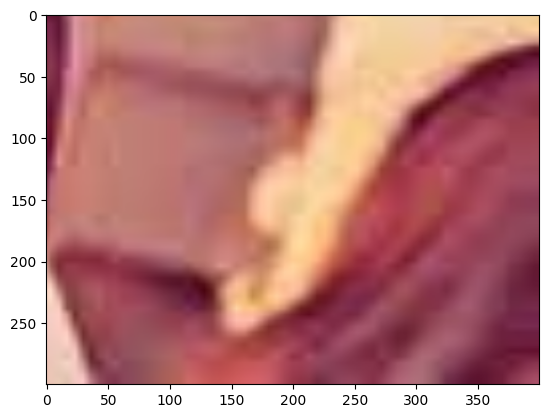

In [45]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

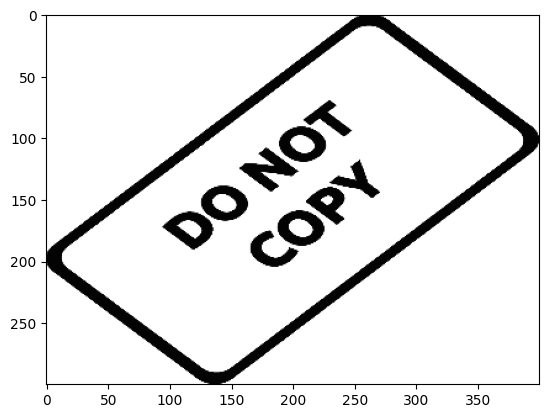

In [46]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap = 'gray')

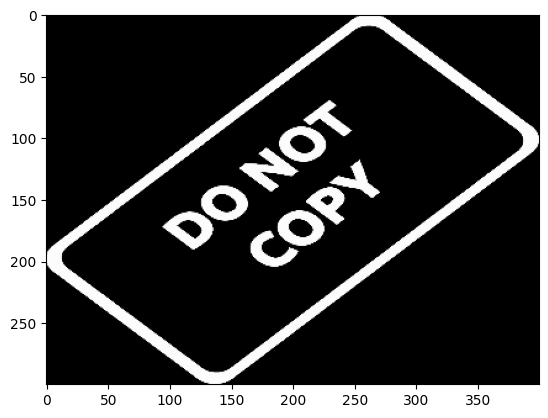

In [47]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray')

In [48]:
mask_inv.shape

(300, 400)

In [49]:
import numpy as np
white_background = np.full(img2.shape, 255, dtype = np.uint8)
white_background.shape

(300, 400, 3)

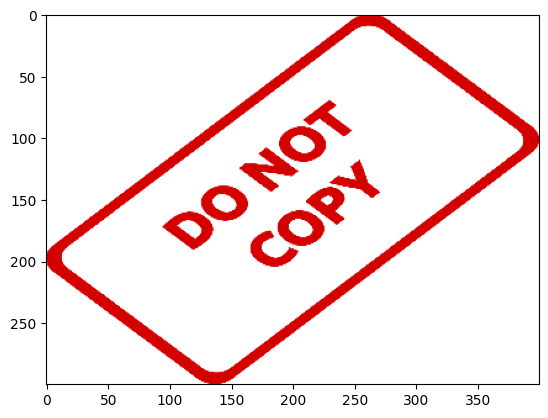

In [53]:
plt.imshow(img2)

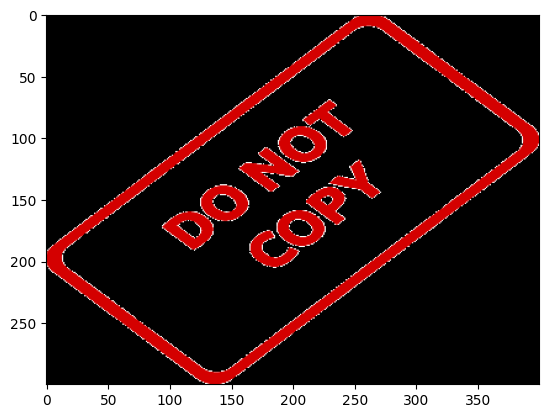

In [50]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

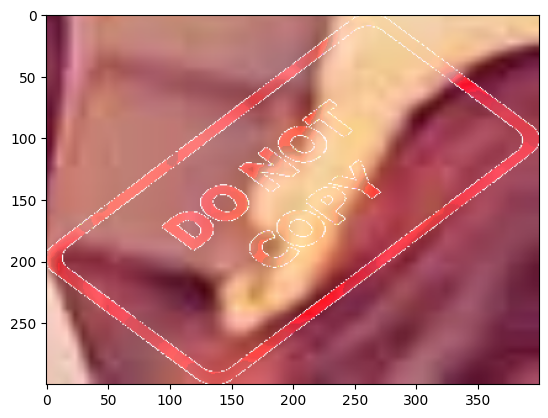

In [51]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

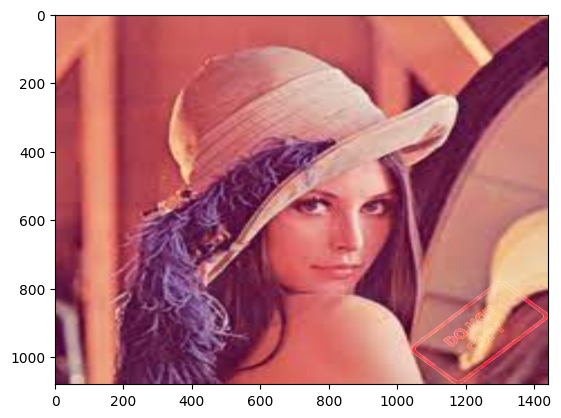

In [52]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

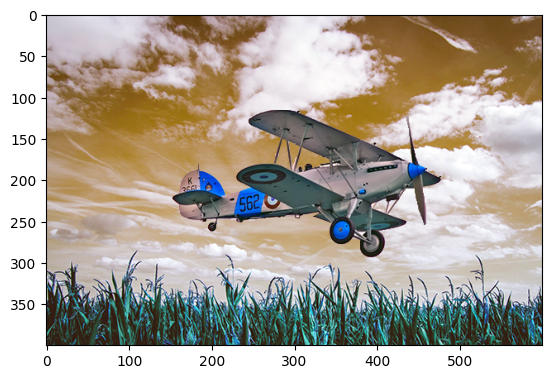

In [55]:
src = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/airplane.bmp")
mask = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/mask_plane.bmp")
dst = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/field.bmp")
plt.imshow(cv2.copyTo(src,mask,dst))

# ROSE BLUR 처리 

In [ ]:
rose = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/rose.bmp", cv2.IMREAD_GRAYSCALE)

kernel = np.array([[1/9,1/9,1/9],
                  [1/9,1/9,1/9],
                  [1/9,1/9,1/9]])

dst = cv2.blur(rose, (3,3))
cv2.imshow('rose', rose)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

# ROSE MEAN FILLTER

In [ ]:
import sys
import numpy as np
import cv2

rose = cv2.imread("/home/seungsu/workspace/opencv/opencv_study/data/rose.bmp", cv2.IMREAD_GRAYSCALE)

if rose is None:
    print("image load failed")
    sys.exit()
cv2.imshow('rose', rose)

for ksize in (3,5,7):
    dst = cv2.blur(src, (ksize, ksize))
    
    desc = "mean : {}*{}".format(ksize,ksize)
    cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255,1,cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()